In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv('telecom_customer_churn.csv')
data.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

In [4]:
data.describe

<bound method NDFrame.describe of      Customer ID  Gender  Age Married  Number of Dependents          City  \
0     0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1     0003-MKNFE    Male   46      No                     0      Glendale   
2     0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3     0011-IGKFF    Male   78     Yes                     0      Martinez   
4     0013-EXCHZ  Female   75     Yes                     0     Camarillo   
...          ...     ...  ...     ...                   ...           ...   
7038  9987-LUTYD  Female   20      No                     0       La Mesa   
7039  9992-RRAMN    Male   40     Yes                     0     Riverbank   
7040  9992-UJOEL    Male   22      No                     0           Elk   
7041  9993-LHIEB    Male   21     Yes                     0  Solana Beach   
7042  9995-HOTOH    Male   36     Yes                     0   Sierra City   

      Zip Code   Latitude   Longitude  Nu

In [5]:
missing_values = data.isnull().sum()

In [6]:
missing_values

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                  

In [7]:
missing_perc = (missing_values/ len(data)) * 100
missing_perc

Customer ID                           0.000000
Gender                                0.000000
Age                                   0.000000
Married                               0.000000
Number of Dependents                  0.000000
City                                  0.000000
Zip Code                              0.000000
Latitude                              0.000000
Longitude                             0.000000
Number of Referrals                   0.000000
Tenure in Months                      0.000000
Offer                                55.047565
Phone Service                         0.000000
Avg Monthly Long Distance Charges     9.683374
Multiple Lines                        9.683374
Internet Service                      0.000000
Internet Type                        21.666903
Avg Monthly GB Download              21.666903
Online Security                      21.666903
Online Backup                        21.666903
Device Protection Plan               21.666903
Premium Tech 

In [8]:
missing_summ = pd.DataFrame({
    "Missing Values": missing_values,
    "Percentage (%)": missing_perc
})

missing_summ[missing_summ['Missing Values'] > 0]

,Missing Values,Percentage (%)
Offer,3877,55.047565
Avg Monthly Long Distance Charges,682,9.683374
Multiple Lines,682,9.683374
Internet Type,1526,21.666903
Avg Monthly GB Download,1526,21.666903
Online Security,1526,21.666903
Online Backup,1526,21.666903
Device Protection Plan,1526,21.666903
Premium Tech Support,1526,21.666903
Streaming TV,1526,21.666903


In [9]:
data['Churn Reason'].fillna('Not Churned', inplace=True)
data['Churn Category'].fillna('Not Churned', inplace=True)

C:\Users\bagad\AppData\Local\Temp\ipykernel_13904\789445465.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Churn Reason'].fillna('Not Churned', inplace=True)
C:\Users\bagad\AppData\Local\Temp\ipykernel_13904\789445465.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [11]:
data.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,Not Churned,Not Churned
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,Not Churned,Not Churned
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [12]:
data['Avg Monthly Long Distance Charges'].fillna(data['Avg Monthly Long Distance Charges'].mean(), inplace=True)
data['Avg Monthly GB Download'].fillna(data['Avg Monthly GB Download'].median(), inplace=True)

C:\Users\bagad\AppData\Local\Temp\ipykernel_13904\3503686969.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Avg Monthly Long Distance Charges'].fillna(data['Avg Monthly Long Distance Charges'].mean(), inplace=True)
C:\Users\bagad\AppData\Local\Temp\ipykernel_13904\3503686969.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object o

In [13]:
data.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,Not Churned,Not Churned
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,Not Churned,Not Churned
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [15]:
data.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download                 0
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                  

In [16]:
cat_columns = ['Internet Type', 'Unlimited Data', 'Streaming Music', 'Streaming Movies',
                       'Streaming TV', 'Premium Tech Support', 'Device Protection Plan',
                       'Online Security', 'Online Backup', 'Multiple Lines']
data[cat_columns] = data[cat_columns].fillna('Unknown')

In [18]:
data.isnull().sum().sort_values(ascending=True)

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Phone Service                           0
Multiple Lines                          0
Avg Monthly Long Distance Charges       0
Internet Service                        0
Internet Type                           0
Streaming Music                         0
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Streaming TV                            0
Streaming Movies                  

In [21]:
sns.set(style='whitegrid')

In [24]:
chrun_counts = data['Customer Status'].value_counts()

In [25]:
chrun_counts

Customer Status
Stayed     4720
Churned    1869
Joined      454
Name: count, dtype: int64

C:\Users\bagad\AppData\Local\Temp\ipykernel_13904\1722818960.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=chrun_counts.index, y=chrun_counts.values,palette='viridis')


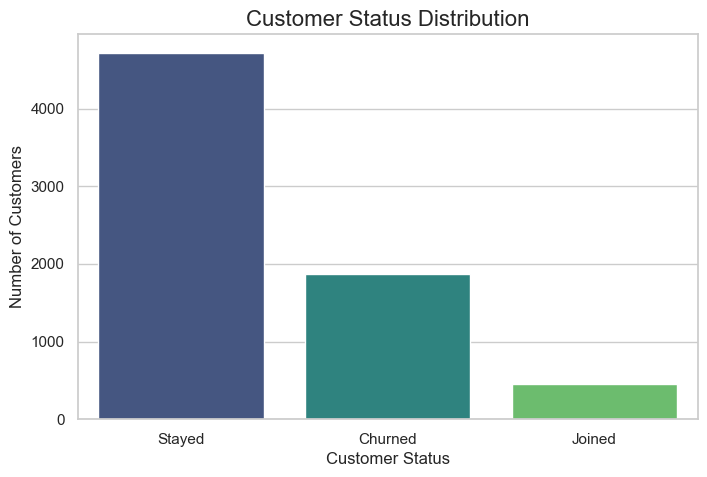

In [26]:
plt.figure(figsize=(8,5))
sns.barplot(x=chrun_counts.index, y=chrun_counts.values,palette='viridis')
plt.title('Customer Status Distribution', fontsize=16)
plt.ylabel('Number of Customers', fontsize=12)
plt.xlabel('Customer Status', fontsize=12)
plt.show()

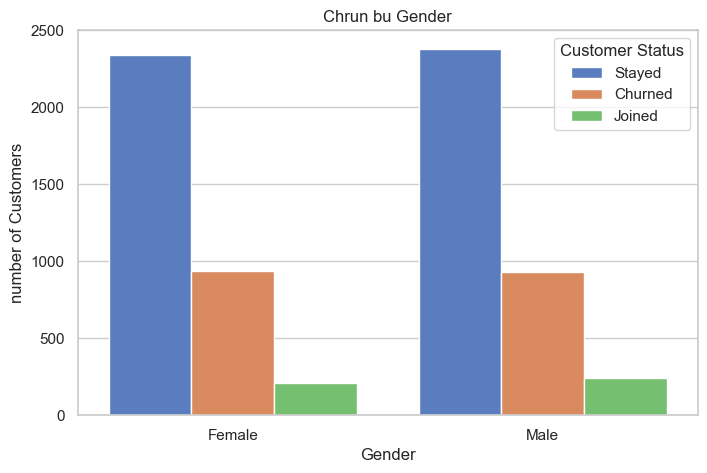

In [27]:
plt.figure(figsize=(8,5))
sns.countplot(data=data,x='Gender', hue='Customer Status',palette='muted')
plt.title('Chrun bu Gender')
plt.xlabel('Gender')
plt.ylabel('number of Customers')
plt.legend(title='Customer Status')
plt.show()

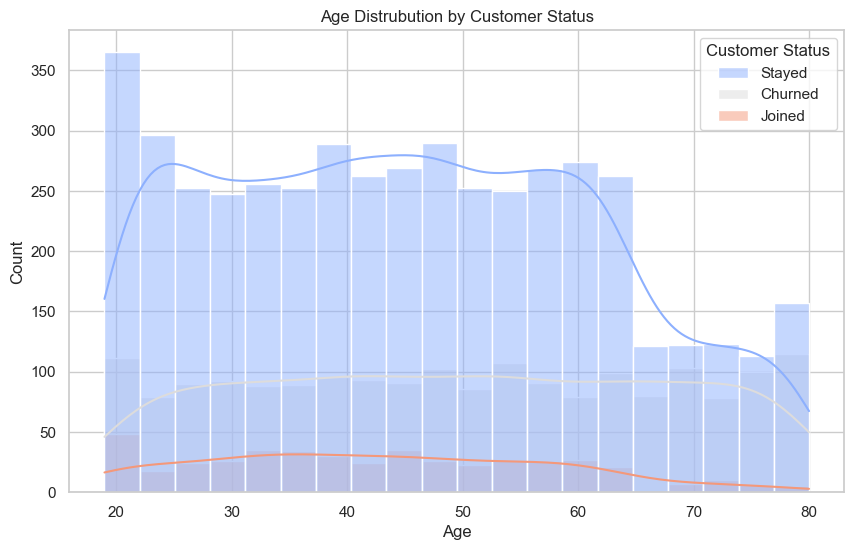

In [28]:
plt.figure(figsize=(10,6))
sns.histplot(data=data,x='Age', hue='Customer Status', kde=True, palette='coolwarm',bins=20)
plt.title('Age Distrubution by Customer Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

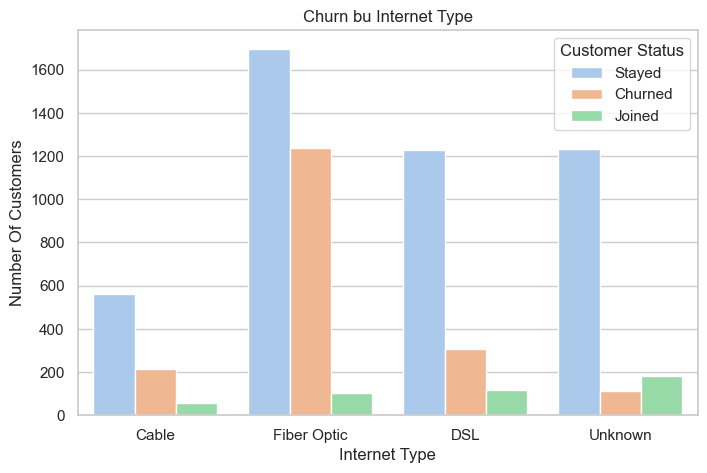

In [30]:
plt.figure(figsize=(8,5))
sns.countplot(data=data, x='Internet Type', hue='Customer Status', palette='pastel')
plt.title('Churn bu Internet Type')
plt.xlabel('Internet Type')
plt.ylabel('Number Of Customers')
plt.show()

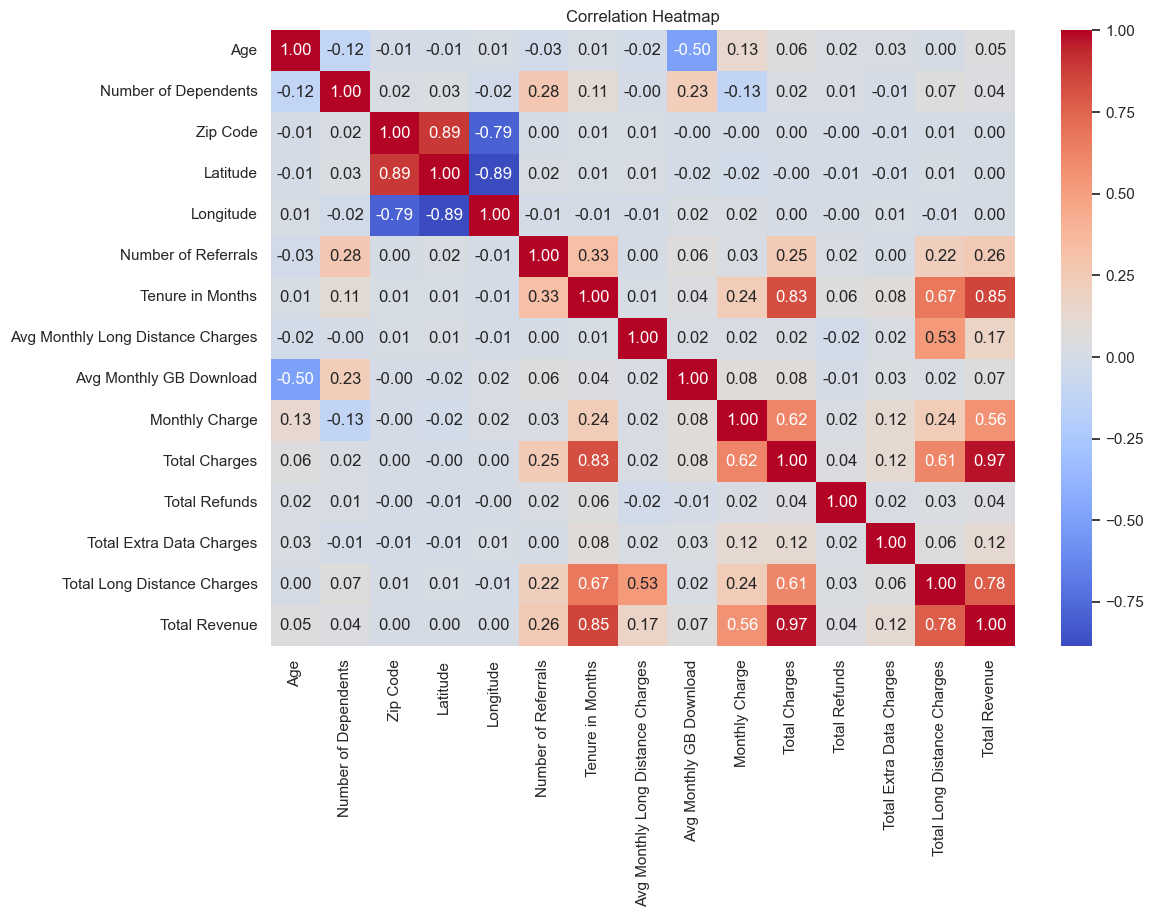

In [33]:
plt.figure(figsize=(12,8))
corr_matrix = data.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()